# Explore here

In [3]:
import ipyleaflet
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import psycopg2
import pymysql
from dotenv import load_dotenv
import requests
from sklearn import datasets, model_selection, metrics
import seaborn as sns
import sqlalchemy
import sympy
import xgboost as xgb


In [4]:
total_data= pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=';')


In [ ]:
total_data.head()
# label es el target

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
total_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
print(total_data.info())
total_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
total_data['quality'].value_counts().sort_index()


quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

Dado que la calidad va desde 3 a 8 siendo el 6 el 50% de los datos, quality=6 será calidad media,esto nos deja varias opciones de reparto, con diferente balance de clases:

La columna objetivo es label:
opción 1:
0 = Baja calidad q=3-4 = 63 instancias
1 = Calidad media q=5-6 = 1319 ""
2 = Alta calidad  q ≥ 7 =217 ""

opción 2:
0 = Baja calidad q=3-5 =  744 instancias
1 = Calidad media q=6  = 638 ""
2 = Alta calidad  q ≥ 7 =217 ""

La clase 2 permanece igual, probablemente la clase 0 se prediga mejor en la opción 2 y la clase 1 en la opción 1

In [5]:

df = total_data.copy() 

In [ ]:
# Opción 1
df['label_v1'] = df['quality'].apply(lambda q: 0 if q <= 4 else (1 if q <= 6 else 2))

# Opción 2
df['label_v2'] = df['quality'].apply(lambda q: 0 if q <= 5 else (1 if q == 6 else 2))


In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label_v1,label_v2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0



🔍 Comparación entre esquemas de clasificación
Evaluación para Esquema 1 (0:<=4, 1:5-6, 2:>=7)

 Mejor k: 9 con Accuracy de Test: 0.8458

 Reporte de clasificación (Test):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.87      0.95      0.91       396
           2       0.61      0.43      0.50        65

    accuracy                           0.85       480
   macro avg       0.49      0.46      0.47       480
weighted avg       0.80      0.85      0.82       480



/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vscode/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


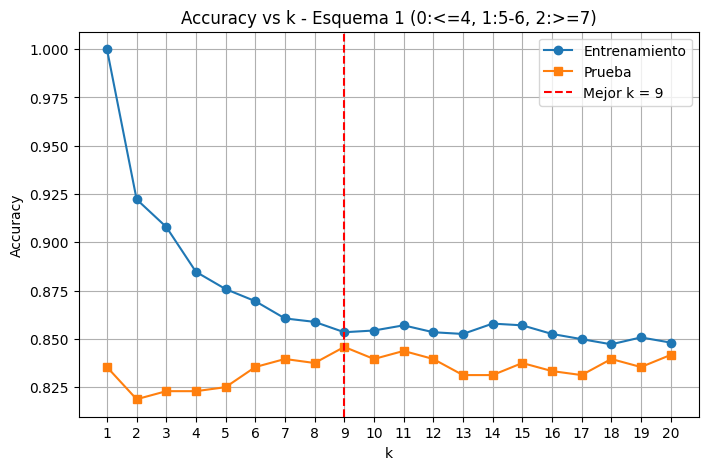

Evaluación para Esquema 2 (0:<=5, 1:6, 2:>=7)

 Mejor k: 1 con Accuracy de Test: 0.6750

 Reporte de clasificación (Test):
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       223
           1       0.63      0.59      0.61       192
           2       0.57      0.72      0.64        65

    accuracy                           0.68       480
   macro avg       0.65      0.68      0.66       480
weighted avg       0.68      0.68      0.68       480



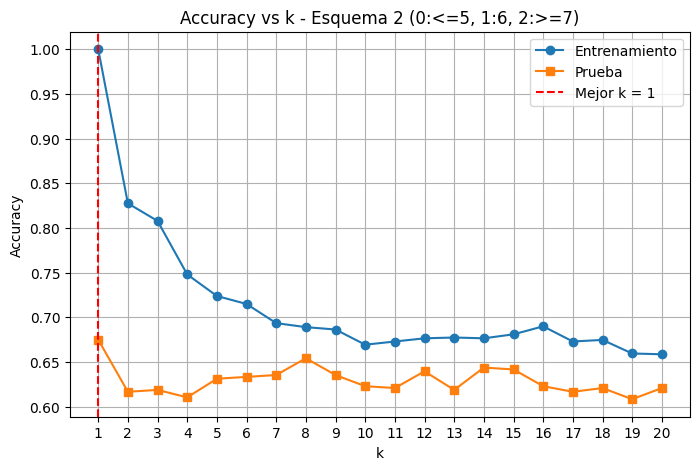

In [34]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X = df.drop(['quality', 'label_v1', 'label_v2'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_v1 = df['label_v1']
y_v2 = df['label_v2']


X_train_v1, X_test_v1, y_train_v1, y_test_v1 = train_test_split(X_scaled, y_v1, test_size=0.3, random_state=42, stratify=y_v1)
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(X_scaled, y_v2, test_size=0.3, random_state=42, stratify=y_v2)

#  Función para evaluar modelo KNN

def evaluate_knn(X_train, X_test, y_train, y_test, label_name):
    print(f"Evaluación para {label_name}")
    train_accuracies = []
    test_accuracies = []
    best_k = 1
    best_acc = 0
    best_model = None
    k_values = range(1, 21)
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)

        acc_train = accuracy_score(y_train, y_pred_train)
        acc_test = accuracy_score(y_test, y_pred_test)

        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)

        if acc_test > best_acc:
            best_acc = acc_test
            best_k = k
            best_model = knn

    # Reporte
    print(f"\n Mejor k: {best_k} con Accuracy de Test: {best_acc:.4f}")
    print("\n Reporte de clasificación (Test):")
    print(classification_report(y_test, best_model.predict(X_test)))

    # Gráfico
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, train_accuracies, label='Entrenamiento', marker='o')
    plt.plot(k_values, test_accuracies, label='Prueba', marker='s')
    plt.axvline(best_k, color='r', linestyle='--', label=f'Mejor k = {best_k}')
    plt.title(f'Accuracy vs k - {label_name}')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()
    plt.show()

    return best_k, best_model


print("\n🔍 Comparación entre esquemas de clasificación")
k1, model1 = evaluate_knn(X_train_v1, X_test_v1, y_train_v1, y_test_v1, "Esquema 1 (0:<=4, 1:5-6, 2:>=7)")
k2, model2 = evaluate_knn(X_train_v2, X_test_v2, y_train_v2, y_test_v2, "Esquema 2 (0:<=5, 1:6, 2:>=7)")


A la vista de los resultados, de manera global la opción 2 tiene una preción más equilibrada para todas las clases, la eleción de la clasificación depende de los objetivos, si se prioriza sólo la clase 1 y 2, puede que incluso estado descompesado sea más apropiado la opcion 2. Si se queire hacer un metodo más ajustado a la realidad, sería la opción 2, aunque tenga un accuracy  medio inferrior, porque si es capaz de predecir todas las clases. 

Siguen siendo valores muy bajos para que sea un buen método para clasificar,


 Mejor valor de k encontrado: 14
EVALUACIÓN FINAL DEL MODELO OPTIMIZADO (ESQUEMA 2)

Distribución de clases (test):
label
0    0.464583
1    0.400000
2    0.135417
Name: proportion, dtype: float64

Matriz de confusión (test):


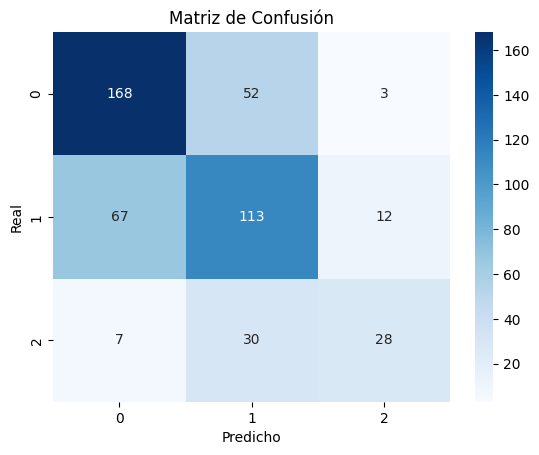


📄 Reporte de clasificación (test):
              precision    recall  f1-score   support

           0      0.694     0.753     0.723       223
           1      0.579     0.589     0.584       192
           2      0.651     0.431     0.519        65

    accuracy                          0.644       480
   macro avg      0.642     0.591     0.608       480
weighted avg      0.642     0.644     0.640       480

 F1-score ponderado: 0.640
 Accuracy: 0.644


In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Cargar los datos nuevamente
df = pd.read_csv(
    "https://raw.githubusercontent.com/4GeeksAcademy/k-nearest-neighbors-project-tutorial/refs/heads/main/winequality-red.csv", sep=';')

# (0: ≤5, 1: 6, 2: ≥7)
df['label'] = df['quality'].apply(lambda q: 0 if q <= 5 else (1 if q == 6 else 2))

X = df.drop(['quality', 'label'], axis=1)
y = df['label']

# Normalización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División estratificada para mantener la misma proporción de clases
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Búsqueda del mejor k (usando GridSearchCV)
param_grid = {'n_neighbors': range(13, 18)}
grid_search = GridSearchCV(
    KNeighborsClassifier(), param_grid,
    cv=5, scoring='f1_weighted', n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"\n Mejor valor de k encontrado: {best_k}")

# Entrenar el modelo final
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

# Evaluación detallada
def detailed_evaluation(model, X_train, X_test, y_train, y_test):
    y_pred_test = model.predict(X_test)

    print("\nDistribución de clases (test):")
    print(pd.Series(y_test).value_counts(normalize=True).sort_index())

    print("\nMatriz de confusión (test):")
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title("Matriz de Confusión")
    plt.show()

    print("\n📄 Reporte de clasificación (test):")
    print(classification_report(y_test, y_pred_test, digits=3))

    print(f" F1-score ponderado: {f1_score(y_test, y_pred_test, average='weighted'):.3f}")
    print(f" Accuracy: {accuracy_score(y_test, y_pred_test):.3f}")

# Ejecutar evaluación
print("EVALUACIÓN FINAL DEL MODELO OPTIMIZADO (ESQUEMA 2)")
detailed_evaluation(final_model, X_train, X_test, y_train, y_test)


ha mejorado con un paso de 5 en los percentiles, con 10 daba peor.

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score
from imblearn.under_sampling import RandomUnderSampler

# 1. Undersampling para balancear las clases
undersampler = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = undersampler.fit_resample(X_train, y_train)

# 2. Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)  # Escalamos el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)  # Escalamos el conjunto de prueba con el mismo scaler

# 3. Modelo KNN ponderado
knn = KNeighborsClassifier(n_neighbors=13, weights='distance')
knn.fit(X_train_scaled, y_train_bal)

# 4. Evaluación del modelo
test_preds = knn.predict(X_test_scaled)

# 5. Resultados finales
print("Clasificación:")
print(classification_report(y_test, test_preds, digits=3))
print(f" Balanced Accuracy: {balanced_accuracy_score(y_test, test_preds):.3f}")
print(f"F1 w: {f1_score(y_test, test_preds, average='weighted'):.3f}")


Clasificación:
              precision    recall  f1-score   support

           0      0.784     0.668     0.722       223
           1      0.573     0.469     0.516       192
           2      0.421     0.862     0.566        65

    accuracy                          0.615       480
   macro avg      0.593     0.666     0.601       480
weighted avg      0.651     0.615     0.618       480

 Balanced Accuracy: 0.666
F1 w: 0.618


Resultados del final_model más interesantes: 

Evaluación para Esquema 2 (0:<=5, 1:6, 2:>=7)

 Mejor k: 1 con Accuracy de Test: 0.6750

 Reporte de clasificación (Test):
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       223
           1       0.63      0.59      0.61       192
           2       0.57      0.72      0.64        65

    accuracy                           0.68       480
   macro avg       0.65      0.68      0.66       480
weighted avg       0.68      0.68      0.68       480

In [78]:
import joblib

# Guardar el modelo entrenado
joblib.dump(final_model, '//workspaces/Finarosalina_KNN_BUENO_ML_WINE/models/final_model.pkl')


['//workspaces/Finarosalina_KNN_BUENO_ML_WINE/models/final_model.pkl']

In [ ]:
def predict_wine_quality(features):
    # Escalar las características
    features_scaled = scaler.transform([features])
    
    # Predecir la calidad utilizando el modelo KNN
    prediction = knn.predict(features_scaled)
    
    # Interpretar la predicción
    if prediction == 0:
        return "Este vino probablemente sea de baja calidad "
    elif prediction == 1:
        return "Este vino probablemente sea de calidad media "
    else:
        return "Este vino probablemente sea de alta calidad "

# Probar la función con un ejemplo
print(predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4]))


Este vino probablemente sea de baja calidad 


In [79]:
def predict_wine_quality(features, model, scaler):
    # Escalar las características
    features_scaled = scaler.transform([features])
    
    # Predecir la calidad utilizando el modelo final
    prediction = model.predict(features_scaled)
    
    # Interpretar la predicción
    if prediction == 0:
        return "Este vino probablemente sea de baja calidad."
    elif prediction == 1:
        return "Este vino probablemente sea de calidad media."
    else:
        return "Este vino probablemente sea de alta calidad."

# Probar la función con un ejemplo
print(predict_wine_quality([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4], final_model, scaler))


Este vino probablemente sea de baja calidad.


In [80]:
import joblib

# Guardar el modelo en la ruta especificada
model_path = '/workspaces/Finarosalina_KNN_BUENO_ML_WINE/models/knn_model.pkl'
joblib.dump(knn, model_path)
print(f"Modelo guardado en: {model_path}")


Modelo guardado en: /workspaces/Finarosalina_KNN_BUENO_ML_WINE/models/knn_model.pkl


In [81]:
import json

with open('/workspaces/Finarosalina_KNN_BUENO_ML_WINE/src/explore.ipynb', 'r') as f:
    notebook_content = json.load(f)


code_cells = [cell['source'] for cell in notebook_content['cells'] if cell['cell_type'] == 'code']


code = '\n'.join([''.join(cell) for cell in code_cells])


with open('/workspaces/Finarosalina_KNN_BUENO_ML_WINE/src/app.py', 'w') as f:
    f.write(code)